In [1]:
import pandas as pd 
import dill

from porise.model.algorithms.cmab import HybridLinUCB
from porise.envs.real.real_env import RealEnv
from porise import Simulator

In [2]:
with open('../porise/data/user_vector_1500.pkl', 'rb') as f:
    user_vector = f.read()
    user_map = dill.loads(user_vector)
print('get user map ready')

get user map ready


In [3]:
env = RealEnv(rat_log_path='../porise/data/reward_nov02_nov30_exp5217.csv', user_vectors_map=user_map)

In [4]:
model = HybridLinUCB(n_arms=env.action_space.n,
              alpha=2,
              arm_feat_dim=len(env.get_user_state()[1][0]),
              user_feat_dim=len(env.get_user_state()[0]),
              return_list=False)

### Train with past N records, every time a new record comes.

In [5]:
simulator = Simulator(model=model,
                     env=env,
                     train_every=int(128),
                     throttle=int(1e2),
                     memory_capacity=int(128),
                     plot_every=int(1e4))

#### 1. N=128 

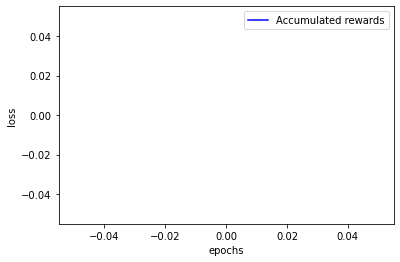

  0%|          | 800/384588 [00:22<3:30:00, 30.46it/s, total reward=1]

In [ ]:
simulator.run()